<a href="https://colab.research.google.com/github/Devika-Pillai/Brief-intro-to-Cell-biology-/blob/main/DESeq2Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
R.version.string


[1] "R version 4.4.0 (2024-04-24)"

In [2]:
meta <- read.table("SampleInfo.txt", header = TRUE)


In [3]:
meta

Sample,PDL1_Exp
<chr>,<chr>
CD274_OE_1_count,OE
CD274_OE_2_count,OE
CD274_OE_1_count,OE
NC_1_count,N
NC_2_count,N
NC_3_count,N


In [4]:
data <-read.table("GSE171372_Raw_gene_counts_matrix.txt", header = TRUE, sep="\t")
head(data)

,gene_id,CD274_OE_1_count,CD274_OE_2_count,CD274_OE_3_count,NC_1_count,NC_2_count,NC_3_count
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000282222,0,0,0,0,0,0
2,ENSG00000282221,19,13,13,18,18,13
3,ENSG00000110514,1003,958,821,946,805,941
4,ENSG00000086015,1115,1176,906,1077,1043,1050
5,ENSG00000250337,2,2,1,7,10,4
6,ENSG00000169740,51,42,41,22,33,48


In [5]:
str(data)

'data.frame':	50868 obs. of  7 variables:
 $ gene_id         : chr  "ENSG00000282222" "ENSG00000282221" "ENSG00000110514" "ENSG00000086015" ...
 $ CD274_OE_1_count: int  0 19 1003 1115 2 51 2 452 12 0 ...
 $ CD274_OE_2_count: int  0 13 958 1176 2 42 0 433 25 0 ...
 $ CD274_OE_3_count: int  0 13 821 906 1 41 1 378 10 0 ...
 $ NC_1_count      : int  0 18 946 1077 7 22 2 491 19 0 ...
 $ NC_2_count      : int  0 18 805 1043 10 33 2 454 10 0 ...
 $ NC_3_count      : int  0 13 941 1050 4 48 1 453 8 0 ...


In [6]:
dim(data)

[1] 50868     7

In [7]:
#Checking number of duplicate Gene ID
sum(duplicated(data))

[1] 0

In [8]:
#Checking NAs counts in the dataset
#which(is.na(data))

In [9]:
genenames <- data$gene_id
head(genenames)

[1] "ENSG00000282222" "ENSG00000282221" "ENSG00000110514" "ENSG00000086015"
[5] "ENSG00000250337" "ENSG00000169740"

In [10]:
names(data)

[1] "gene_id"          "CD274_OE_1_count" "CD274_OE_2_count" "CD274_OE_3_count"
[5] "NC_1_count"       "NC_2_count"       "NC_3_count"

In [11]:
data <- data[, 2:7]
#head(data)
rownames(data) <- genenames
head(data)

,CD274_OE_1_count,CD274_OE_2_count,CD274_OE_3_count,NC_1_count,NC_2_count,NC_3_count
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000282222,0,0,0,0,0,0
ENSG00000282221,19,13,13,18,18,13
ENSG00000110514,1003,958,821,946,805,941
ENSG00000086015,1115,1176,906,1077,1043,1050
ENSG00000250337,2,2,1,7,10,4
ENSG00000169740,51,42,41,22,33,48


In [12]:
class(data)
data <- as.matrix(data)
class(data)

[1] "data.frame"

[1] "matrix" "array"

In [13]:
coldata <- data.frame("condition"=as.factor(c(rep("overexp",3),rep("normal",3))),row.names=colnames(data))

In [14]:
head(coldata)

,condition
,<fct>
CD274_OE_1_count,overexp
CD274_OE_2_count,overexp
CD274_OE_3_count,overexp
NC_1_count,normal
NC_2_count,normal
NC_3_count,normal


In [15]:
#Pre-filtering
data <- data[rowSums(data)>=10,]
dim(data)
#head(data)

[1] 19244     6

In [16]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.22), R 4.4.0 (2024-04-24)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘Rcpp’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'bit', 'brio', 'bslib', 'callr', 'curl', 'data.table', 'DBI',
  'dbplyr', 'devtools', 'digest', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable',
  'highr', 'htmltools', 'httr2', 'isoband', 'k

In [17]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading r

In [18]:
dds <- DESeqDataSetFromMatrix(countData=data, colData=coldata, design= ~condition)
dds

class: DESeqDataSet 
dim: 19244 6 
metadata(1): version
assays(1): counts
rownames(19244): ENSG00000282221 ENSG00000110514 ... ENSG00000182872
  ENSG00000182873
rowData names(0):
colnames(6): CD274_OE_1_count CD274_OE_2_count ... NC_2_count
  NC_3_count
colData names(1): condition

In [19]:
dds<-DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [20]:
#Save the normalized_counts
normalized_counts <- counts(dds,normalized=TRUE)
head(normalized_counts)
write.table(normalized_counts,'/content/normalized_counts.txt',sep="\t")

,CD274_OE_1_count,CD274_OE_2_count,CD274_OE_3_count,NC_1_count,NC_2_count,NC_3_count
ENSG00000282221,17.875437,11.944384,15.417304,17.385500,18.08556,12.645983
ENSG00000110514,943.634897,880.209248,973.662066,913.704603,808.82641,915.374603
ENSG00000086015,1049.005892,1080.507385,1074.467517,1040.232408,1047.95770,1021.406305
ENSG00000250337,1.881625,1.837598,1.185946,6.761028,10.04753,3.891072
ENSG00000169740,47.981435,38.589549,48.623806,21.248944,33.15686,46.692860
ENSG00000261609,425.247232,397.839879,448.287772,474.237801,456.15800,440.663863


In [21]:
res <- results(dds,contrast=c('condition','overexp','normal'),alpha=0.10)
res
write.table(res,'/content/deseq2_result.txt')

log2 fold change (MLE): condition overexp vs normal 
Wald test p-value: condition overexp vs normal 
DataFrame with 19244 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat    pvalue
                 <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000282221   15.55903     -0.0901742 0.5110710 -0.176442 0.8599470
ENSG00000110514  905.90197      0.0838327 0.1081637  0.775054 0.4383076
ENSG00000086015 1052.26287      0.0430692 0.0882516  0.488028 0.6255302
ENSG00000250337    4.26747     -2.0574385 1.0727393 -1.917930 0.0551199
ENSG00000169740   39.38224      0.4172257 0.3832211  1.088734 0.2762714
...                    ...            ...       ...       ...       ...
ENSG00000143450   15.11121       0.200866 0.5291268  0.379619  0.704229
ENSG00000280310    2.37098       0.940273 1.6044665  0.586035  0.557852
ENSG00000280311    2.33123      -0.379672 1.2459594 -0.304723  0.760577
ENSG00000182872 1375.19224       0.107803 0.0966674  1.115193  0.26

In [22]:
summary(res)


out of 19244 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 13, 0.068%
LFC < 0 (down)     : 20, 0.1%
outliers [1]       : 26, 0.14%
low counts [2]     : 3358, 17%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [23]:
resOrdered <- res[order(res$padj),]
resOrdered

log2 fold change (MLE): condition overexp vs normal 
Wald test p-value: condition overexp vs normal 
DataFrame with 19244 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat       pvalue
                 <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSG00000120217  1339.8464       4.668786 0.1546046  30.19824 2.49825e-200
ENSG00000044574 49627.3691      -0.618878 0.0626382  -9.88020  5.07319e-23
ENSG00000051108  1035.0281      -0.748548 0.1054538  -7.09835  1.26258e-12
ENSG00000155660  7083.7336      -0.484410 0.0746256  -6.49121  8.51519e-11
ENSG00000261409    21.8739      -3.943865 0.6938056  -5.68439  1.31277e-08
...                    ...            ...       ...       ...          ...
ENSG00000213036    2.65433      -1.086062  1.213409 -0.895050     0.370760
ENSG00000260954    3.81315       0.668190  0.988102  0.676235     0.498891
ENSG00000260955    1.98462      -1.550260  1.425549 -1.087483     0.276824
ENSG00000280310    2.37098       0

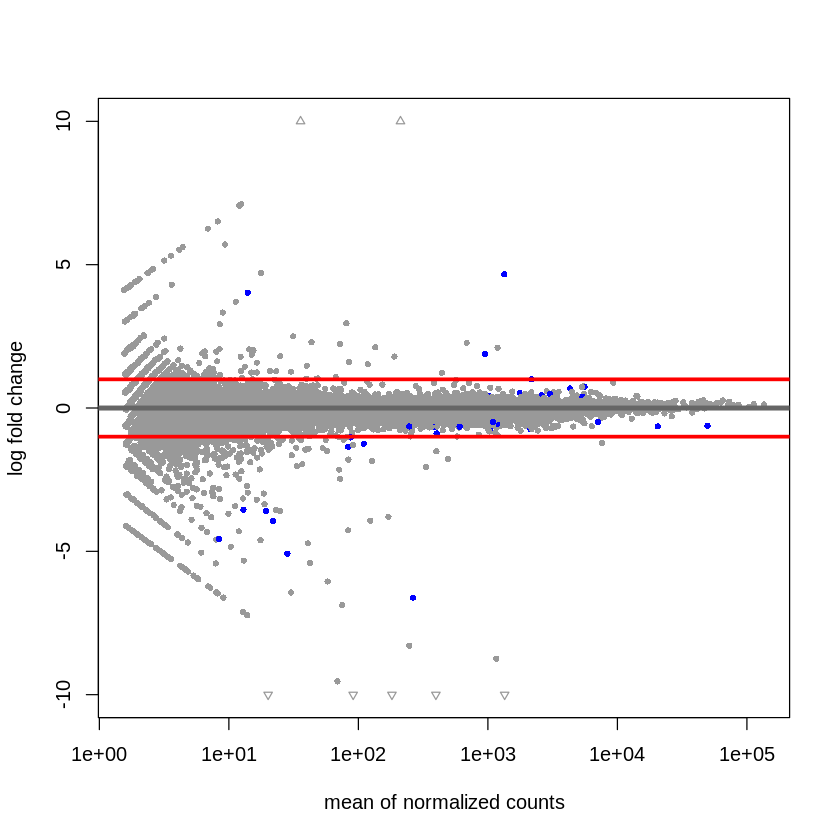

In [24]:
plotMA(res,cex=0.7,ylim=c(-10,10))
abline(h=c(-1,1),col="red",lwd=3)

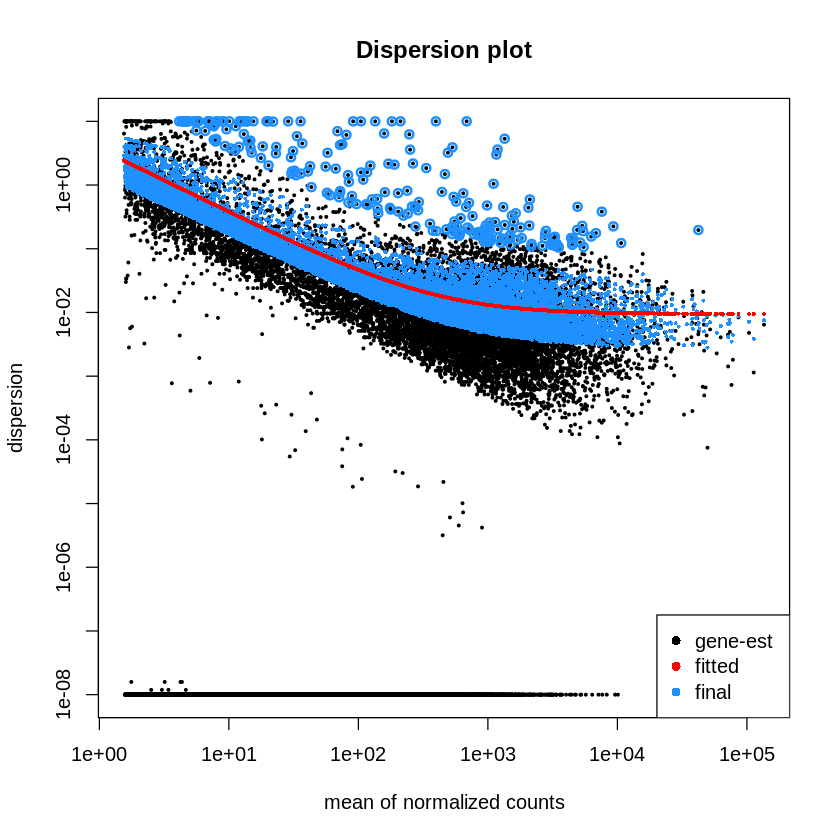

In [29]:
plotDispEsts(dds, main="Dispersion plot")